In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('adult.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]


In [ ]:
df = pd.read_csv('adult.csv', names=columns, na_values='?')
df_clean = df.dropna()
df_clean['income'] = df_clean['income'].map({'<=50K': 0, '>50K': 1})
print(" Cleaned dataset shape:", df_clean.shape)
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

 Cleaned dataset shape: (30163, 15)

Missing values after cleaning:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            1
dtype: int64


/tmp/ipython-input-3081845073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['income'] = df_clean['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:

print("Before cleaning:", df.shape)
df_clean = df.dropna()
print("After cleaning:", df_clean.shape)


NameError: name 'df' is not defined

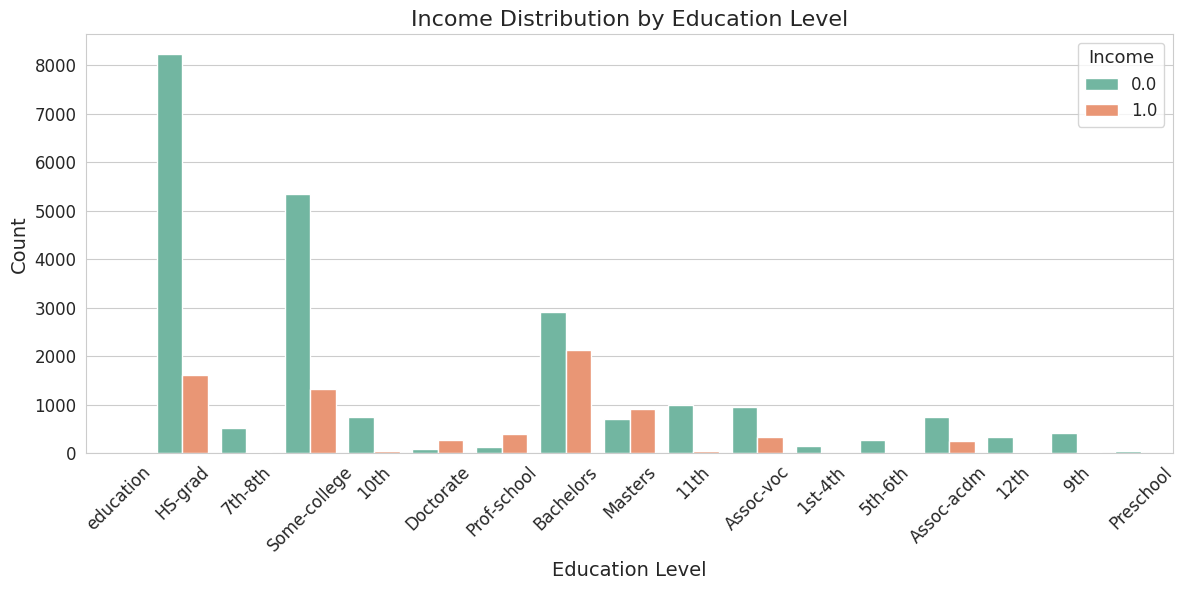

In [ ]:

sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='education', hue='income', palette='Set2')
plt.title('Income Distribution by Education Level', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()





/tmp/ipython-input-3636388543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


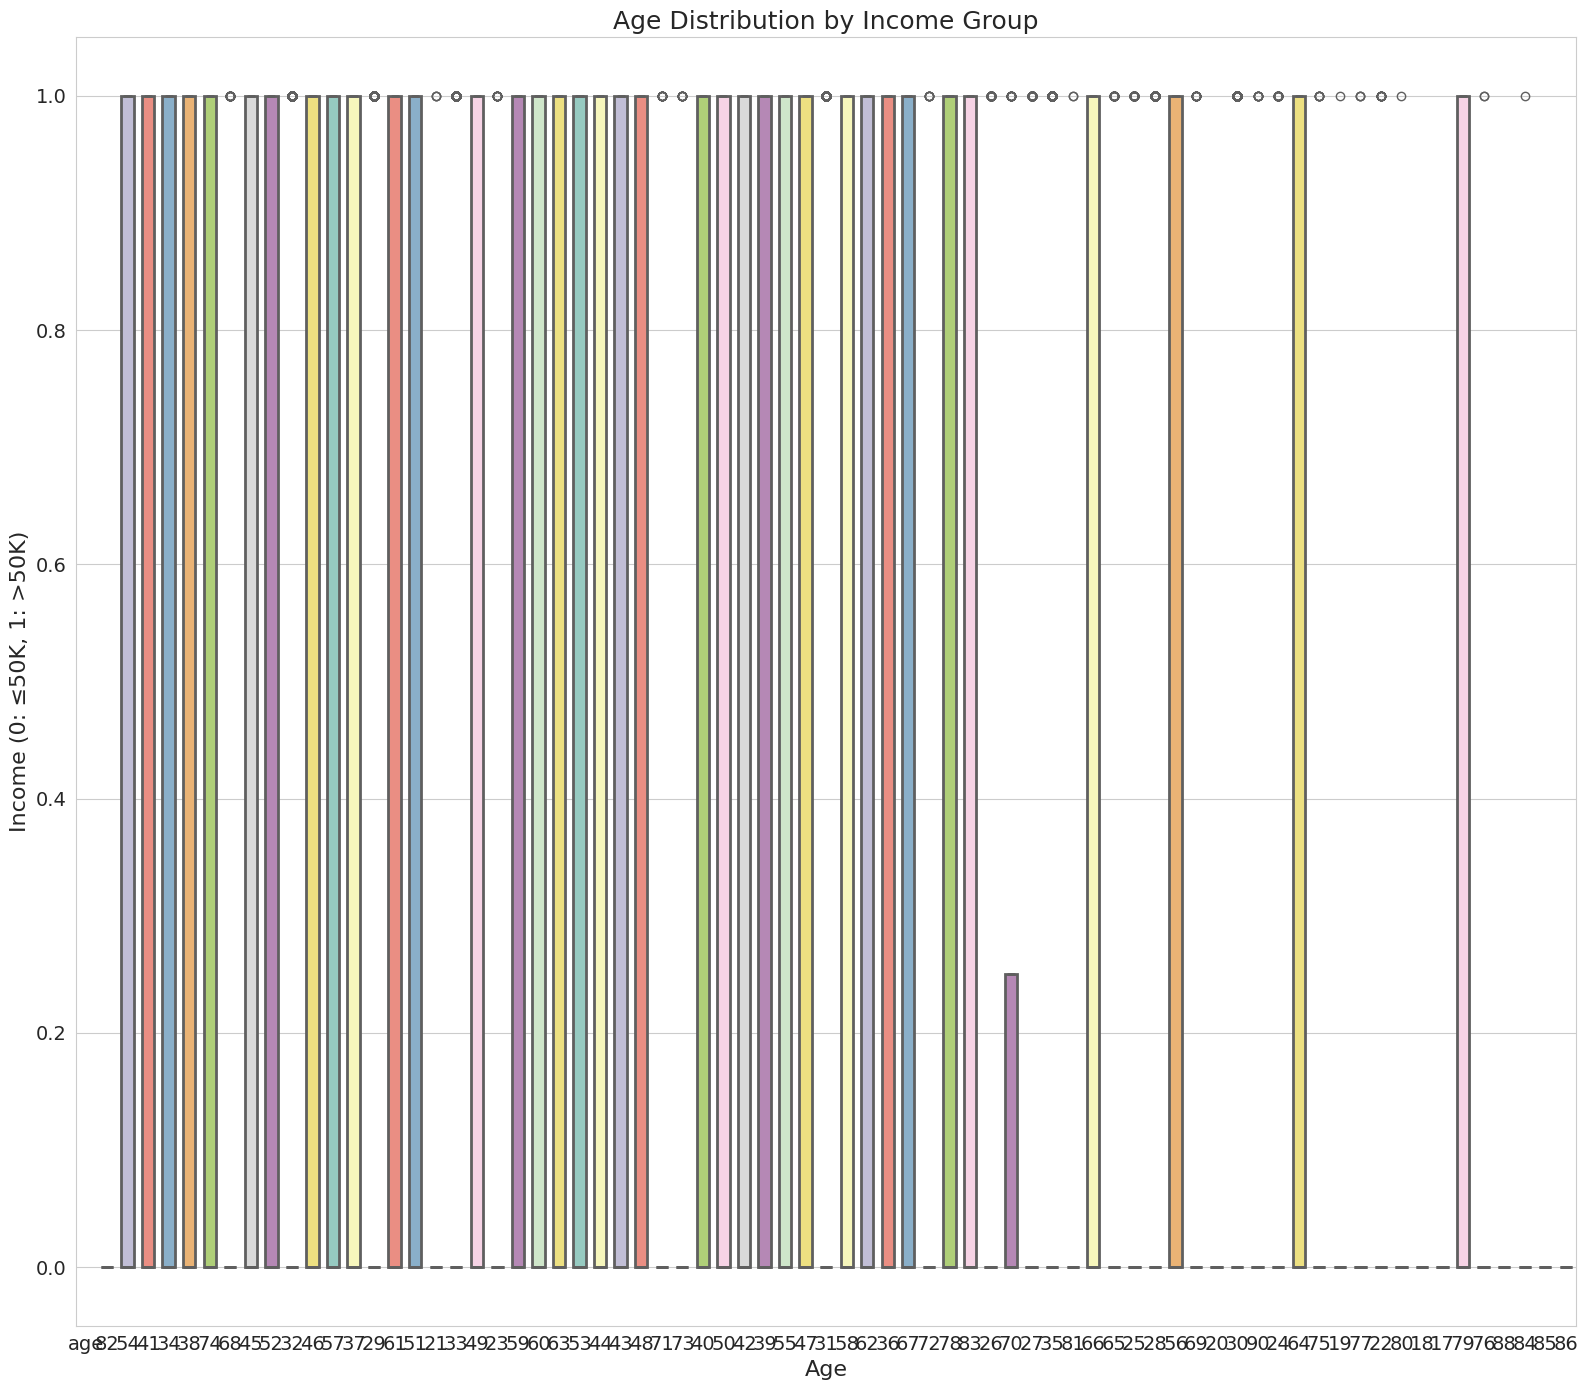

In [ ]:
plt.figure(figsize=(16, 14))
sns.boxplot(
    data=df_clean,
    y='income',
    x='age',
    palette='Set3',
    linewidth=2,
    width=0.6
)
plt.title('Age Distribution by Income Group', fontsize=18)
plt.ylabel('Income (0: ≤50K, 1: >50K)', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Prepare features (drop fnlwgt – known irrelevant)
features = ['age', 'workclass', 'education', 'marital_status', 'occupation',
            'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
            'hours_per_week', 'native_country']
X = df_clean[features]
y = df_clean['income']

# Remove the first row which contains column names
X = X.iloc[1:]
y = y.iloc[1:]

# Encode categorical features
X_encoded = X.copy()
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("=== MODEL PERFORMANCE  ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

=== MODEL PERFORMANCE  ===
Accuracy: 0.8634178683905188

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4531
        >50K       0.80      0.60      0.69      1502

    accuracy                           0.86      6033
   macro avg       0.84      0.77      0.80      6033
weighted avg       0.86      0.86      0.86      6033



/tmp/ipython-input-452601183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='pink')


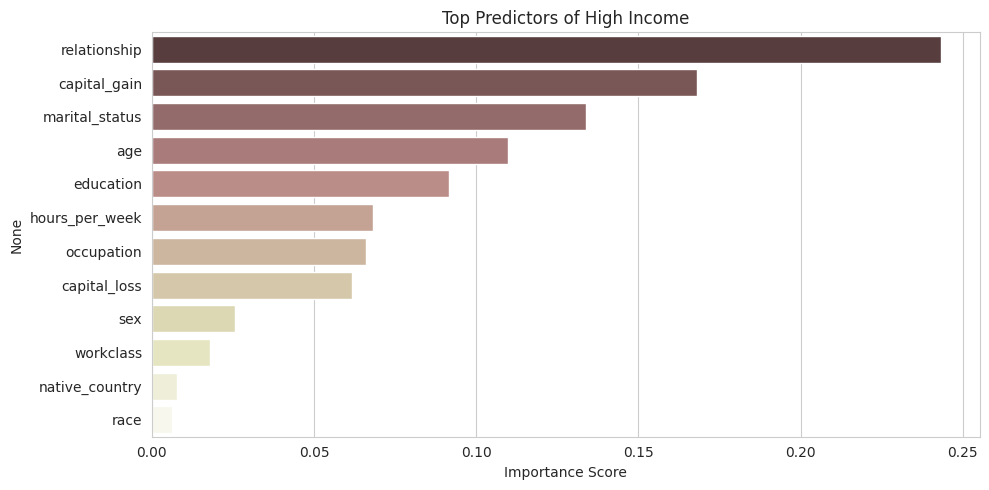


 Top 3 Drivers of High Income:
relationship      0.243167
capital_gain      0.167948
marital_status    0.133820
dtype: float64


In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances.values, y=importances.index, palette='pink')
plt.title('Top Predictors of High Income')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\n Top 3 Drivers of High Income:")
print(importances.head(3))


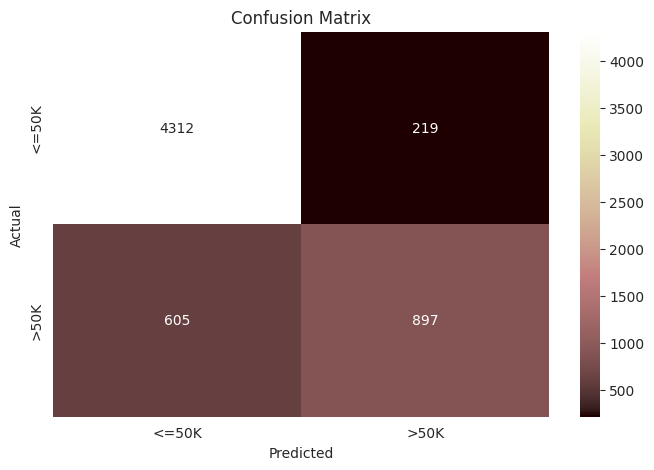

Before SMOTE: income
0.0    22654
1.0     7508
Name: count, dtype: int64
After SMOTE: income
0.0    22654
1.0    22654
Name: count, dtype: int64

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}

IMPROVED MODEL PERFORMANCE
Accuracy: 0.9038620918282778

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.97      0.90      0.93      4531
        >50K       0.75      0.92      0.83      1502

    accuracy                           0.90      6033
   macro avg       0.86      0.91      0.88      6033
weighted avg       0.92      0.90      0.91      6033



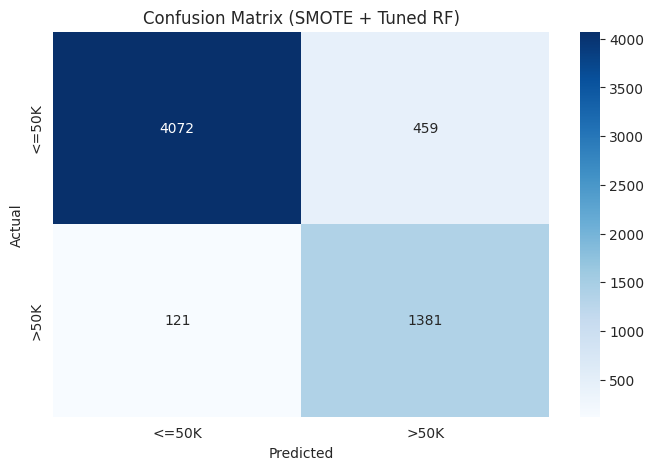

/tmp/ipython-input-706475606.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_best.values, y=importances_best.index, palette='Reds')


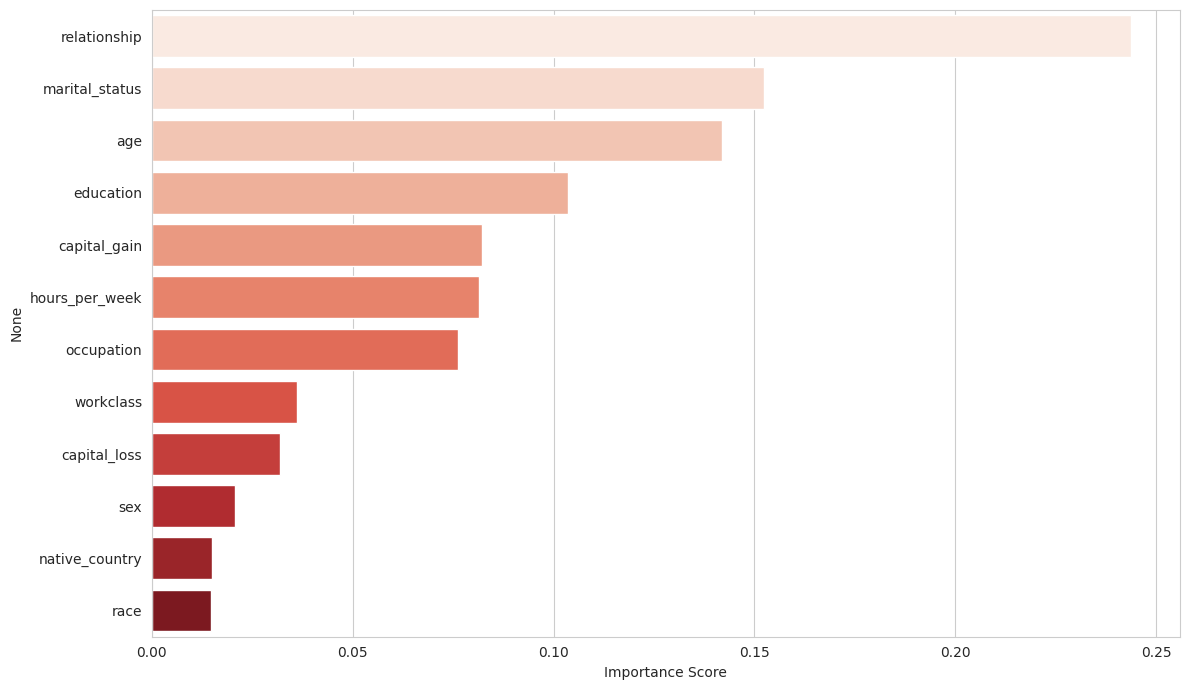


Top 3 Drivers of High Income (Improved Model):
relationship      0.243732
marital_status    0.152361
age               0.142048
dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())

param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_resampled, y_resampled)

best_rf = random_search.best_estimator_
print("\nBest Hyperparameters:", random_search.best_params_)

y_pred_best = best_rf.predict(X_test)

print("\nIMPROVED MODEL PERFORMANCE")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['<=50K', '>50K']))

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix (SMOTE + Tuned RF)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

importances_best = pd.Series(best_rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=importances_best.values, y=importances_best.index, palette='Reds')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 3 Drivers of High Income (Improved Model):")
print(importances_best.head(3))